<a href="https://colab.research.google.com/github/SeaBebop/CBIS_DDSM-File-Sorter/blob/main/ColabAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import csv
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
#from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
      # install the pydicom package
from PIL import Image # install the pillow package and it is called PIL.
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
# train autoencoder for classification with no compression in the bottleneck layer
import keras
from keras import layers

data = pd.read_csv("/content/DCM_File_Paths_Reduced.csv")

size_list_dir = []
finalized_list_dir = []

#Will be used for comparsion to find the ROI dcm files
Label_list = []
#Number of Images
Number_of_Images=[]
Pathology=[]
folder = []
#The counter is used to align the labels and the File Location together
counter = 0;

#print()
#Checker is to test the individual file location and how does it look as a str
checker = ''
data=data.sort_values('DCM_File_Path')
reduced_file_path =  '/content/drive/MyDrive/reduced_files/'
#Figuring out how to extract data from googledrive
print( reduced_file_path + data['Label'].iloc[0] +"/" + os.listdir('/content/drive/MyDrive/reduced_files/' + data['Label'].iloc[0])[0])


/content/drive/MyDrive/reduced_files/Calc-Test_P_00041_LEFT_CC_2/1-1.dcm


100%|██████████| 700/700 [00:03<00:00, 175.28it/s]


Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_91 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 64, 64, 128)       147

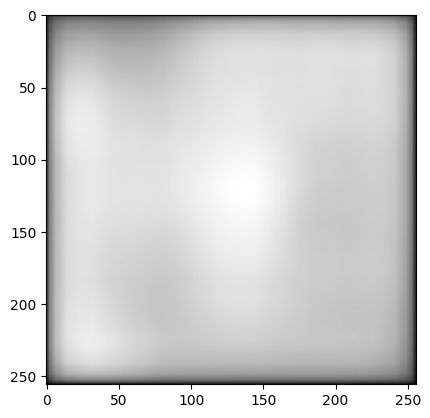

In [ ]:
    import numpy as np
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape

    import matplotlib.pyplot as plt
    import pandas as pd

    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.models import Model, Sequential
    import keras
    from keras.models import Model, Sequential
    from keras.layers import Input, Dense, Conv2D
    from keras.layers import MaxPooling2D, UpSampling2D, Flatten, Reshape
    #from keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.regularizers import l1
    import matplotlib.pyplot as plt

    import pydicom        # install the pydicom package
    from PIL import Image # install the pillow package and it is called PIL.
    from sklearn.model_selection import train_test_split

    from matplotlib import pyplot
    # train autoencoder for classification with no compoutputression in the bottleneck layer
    import keras
    from keras import layers
    # train autoencoder for classification with no compression in the bottleneck layer
    import keras
    from keras import layers
    h = 256
    w = 256
    ch = 1




    #This is the example code that tests out dcms
    #Using the finalized_list_dir I can use my locations
    #This also means of course I can loop them, show the labels of each of them,etc

    trigger = 0
    counter = 0
    dcmMask = np.zeros((len(data),h,w,1), dtype="float")
    y_label = []


    for i in tqdm(range(0,len(data))):
        #Setting up x and y
        dicomdata = pydicom.read_file(reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir('/content/drive/MyDrive/reduced_files/' + data['Label'].iloc[i])[0],force=True)  # masked image
        if data['Classification'].iloc[i]  == 'BENIGN':
            y_label.append(0)
        else:
            y_label.append(1)

        #Testing if labels and dcm align properly
        #if trigger < 5:
        #    print('This is class ',i+20,edited_df['Classification'].iloc[i+20])
        #    print('This is path ', i+20,edited_df['DCM_File_Path'].iloc[i+20])
        #    trigger+=1
        #Converting to numpy array
        tmp = np.zeros((dicomdata.Rows, dicomdata.Columns), dtype="float32")
        tmp = dicomdata.pixel_array/65535.0

        img = Image.fromarray(tmp)
        img_resize = img.resize((h,w), Image.LANCZOS)
        tmp2 = img_to_array(img_resize)
        dcmMask[i] = tmp2.reshape((h,w,ch))
        #Testing if data is set up as a 3d Rensor
        """
        if trigger != 10:
            print('this is dimension',dcmMask[i].ndim)
            print('this is shape',dcmMask[i].shape)
            print('this is type',dcmMask[i].dtype)
            print('this looks like this', dcmMask[i])
            print('this is path:',reduced_file_path + data['Label'].iloc[i]
                                      + "/" + os.listdir('/content/drive/MyDrive/reduced_files/' + data['Label'].iloc[i])[0])
            print('this is path classification:',data['Classification'].iloc[i])
            trigger+=1
        """
        #If you are interested to see all the pictures individually,increased runtime
        #data = tmp2.reshape((h,w,ch))
        #plt.imshow(np.reshape(data, (h, w)), cmap='gray')
        #plt.show()
    #print(dcmMask.shape)
    """
    x_train, x_test, y_train, y_test = train_test_split(dcmMask, y_label, test_size=0.30, random_state=7)

    #Normalize the array to 0 and 1
    #print(x_train.shape)
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    #print(x_train.shape)

    #######Working pr
    #######Basic autoencoder example from https://blog.keras.io/building-autoencoders-in-keras.html
    # This is the size of our encoded representations
    dim_1 = 32768
    dim_2 = 16384
    dim_3 = 8192
  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

    #Change to fit our current expected input (256,256,1)
    n_input = 256*256*1
    # This is our input image
    input_img = keras.Input(shape=(n_input,))
    # "encoded" is the encoded representation of the input
    encoded_1 = layers.Dense(dim_1, activation='relu')(input_img)
    encoded_2 = layers.Dense(dim_2, activation='relu')(encoded_1)
    # "decoded" is the lossy reconstruction of the input
    bottleneck = layers.Dense(dim_3, activation='relu')(encoded_2)

    decoded_1 = layers.Dense(dim_2, activation='relu')(bottleneck)
    decoded_2 = layers.Dense(dim_1, activation='relu')(decoded_1)
    output = layers.Dense(n_input, activation='sigmoid')(decoded_2)

    # This model maps an input to its reconstruction
    autoencoder = keras.Model(input_img, output)

    # This model maps an input to its encoded representation
    encoder = keras.Model(input_img, bottleneck)
    # This is our encoded (32-dimensional) input
    encoded_input = keras.Input(shape=(dim_3,))
    # Retrieve the last layer of the autoencoder model
    decoder_layer_1 = autoencoder.layers[-3]
    decoder_layer_2 = autoencoder.layers[-2](decoder_layer_1)
    decoded =  autoencoder.layers[-1](decoder_layer_2)
    # Create the decoder model
    decoder = keras.Model(encoded_input, decoded)
    """
    input_img = Input(shape=(h,w,ch))
    encoding_dim = 6

    # Encoder
    x = Conv2D(64,(3,3),activation='relu',padding='same')(input_img)
    x = MaxPooling2D((2,2),padding='same')(x)
    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((2,2),padding='same')(x)
    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((2,2),padding='same')(x)
    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((2,2),padding='same')(x)
    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((2,2),padding='same')(x)
    x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
    x = MaxPooling2D((2,2),padding='same')(x)
    x = Flatten()(x)

    encoded = Dense(256, activation='relu')(x)

    # Decoda
    x = Dense(4*4*8, activation='relu')(encoded)
    x = Reshape((4,4,8))(x)
    x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
    x = UpSampling2D((2,2))(x)

    decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    autoencoder.compile(optimizer='Adam', loss='mse')

    autoencoder.summary()
    encoder.summary()
    autoencoder.fit(
    dcmMask,
    dcmMask,
    epochs=3,
    batch_size=128,
    shuffle=True
)
        ## Generated images
    train_encoded = encoder.predict(dcmMask, verbose=1)
    train_decoded = autoencoder.predict(dcmMask, verbose=1)

    # Check dimesnsions
    print(train_encoded.shape)
    print(train_decoded.shape)



    # Display original image after reshaping
    plt.imshow(dcmMask[0].reshape(256, 256), cmap='gray')



    #Show the generated image by AutoEncoder
    # train_decoded is the output of the decoder,i.e.,regenerated images
    plt.imshow(train_decoded[0].reshape(256, 256), cmap='gray')

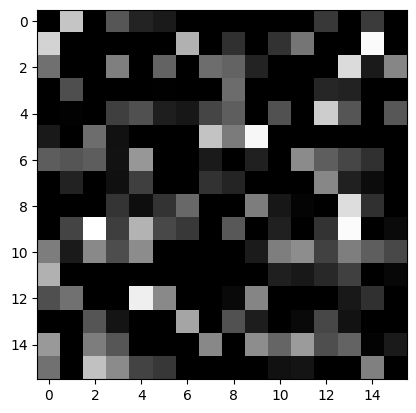

In [84]:
plt.imshow(train_encoded[0].reshape(16,16), cmap='gray')

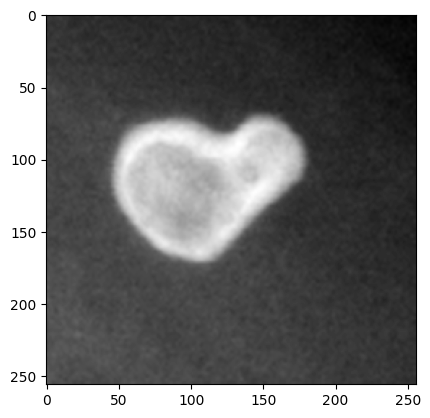

In [86]:
plt.imshow(dcmMask[0].reshape(256,256), cmap='gray')

In [ ]:
  train_decoder_ = Model(encoded, decoded)

In [85]:
print(dcmMask[0].reshape(256,256))

[[0.25551143 0.25682706 0.25642225 ... 0.08332575 0.06739087 0.05685   ]
 [0.25704181 0.25983223 0.26177108 ... 0.0820563  0.06810581 0.05895346]
 [0.25890243 0.2637535  0.26903942 ... 0.07962195 0.06920575 0.06265264]
 ...
 [0.39684159 0.39345264 0.38436052 ... 0.23852788 0.23353657 0.22918691]
 [0.38836956 0.3871491  0.37965021 ... 0.23934172 0.23484403 0.23135523]
 [0.38255367 0.38277075 0.37661287 ... 0.2397844  0.23614229 0.23364088]]


In [ ]:
print(train_decoded[0].reshape(256,256))

[[0.5272084  0.5357277  0.53992766 ... 0.53591704 0.5305147  0.5183341 ]
 [0.5382282  0.5504969  0.55749047 ... 0.5531169  0.54393    0.5264916 ]
 [0.54356855 0.5566023  0.56445855 ... 0.55852395 0.5480257  0.52795345]
 ...
 [0.5401494  0.5517286  0.5596184  ... 0.55601245 0.5467622  0.5270444 ]
 [0.53667116 0.5460365  0.55263466 ... 0.5513386  0.5434984  0.52644587]
 [0.522549   0.5242751  0.52736783 ... 0.52563894 0.52180016 0.51278985]]


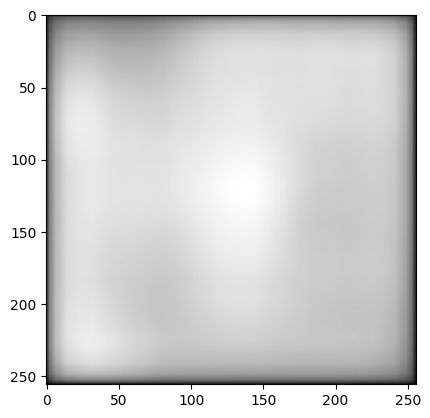

In [83]:
plt.imshow(train_decoded[0].reshape(256, 256), cmap='gray')

In [ ]:
train_decoded.shape

(700, 256, 256, 1)

In [ ]:
print(dcmMask[0].reshape(256,256))

[[0.25551143 0.25682706 0.25642225 ... 0.08332575 0.06739087 0.05685   ]
 [0.25704181 0.25983223 0.26177108 ... 0.0820563  0.06810581 0.05895346]
 [0.25890243 0.2637535  0.26903942 ... 0.07962195 0.06920575 0.06265264]
 ...
 [0.39684159 0.39345264 0.38436052 ... 0.23852788 0.23353657 0.22918691]
 [0.38836956 0.3871491  0.37965021 ... 0.23934172 0.23484403 0.23135523]
 [0.38255367 0.38277075 0.37661287 ... 0.2397844  0.23614229 0.23364088]]


In [ ]:
print()

In [ ]:
print()

In [ ]:
    train_decoded = train_decoder_.predict(train_encoded, verbose=1)

    # Check dimesnsions
    print(train_encoded.shape)
    print(train_decoded.shape)



    # Display original image after reshaping
    plt.imshow(dcmMask[0].reshape(256, 256), cmap='gray')

    print(train_decoded[0])

    #Show the generated image by AutoEncoder
    # train_decoded is the output of the decoder,i.e.,regenerated images
    plt.imshow(train_decoded[0].reshape(256, 256), cmap='gray')

InvalidArgumentError: ignored

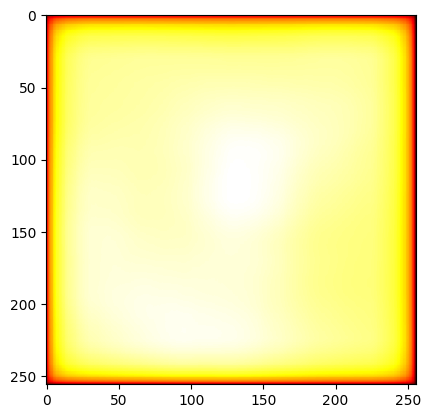

In [ ]:
    plt.imshow(train_decoded[0].reshape(256, 256), cmap='hot')

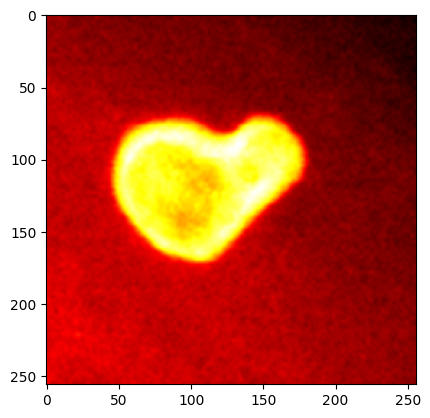

In [ ]:
plt.imshow(dcmMask[0].reshape(256, 256,1), cmap='hot')

In [ ]:
print(train_decoded[0].reshape(256, 256))

[[[0.51428   ]
  [0.5214453 ]
  [0.5229727 ]
  ...
  [0.5203105 ]
  [0.519081  ]
  [0.5075329 ]]

 [[0.52687734]
  [0.5414504 ]
  [0.5453381 ]
  ...
  [0.53964293]
  [0.5363881 ]
  [0.5158078 ]]

 [[0.52866673]
  [0.5448798 ]
  [0.54957867]
  ...
  [0.54464406]
  [0.54061884]
  [0.5170526 ]]

 ...

 [[0.5320595 ]
  [0.5502841 ]
  [0.5568544 ]
  ...
  [0.552563  ]
  [0.5471818 ]
  [0.5220498 ]]

 [[0.5305435 ]
  [0.5467995 ]
  [0.5521914 ]
  ...
  [0.5470276 ]
  [0.5426671 ]
  [0.5206256 ]]

 [[0.51962227]
  [0.5297286 ]
  [0.53321433]
  ...
  [0.53179365]
  [0.5292094 ]
  [0.5167529 ]]]


In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.3 MB/s eta 0:00:00


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.8 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DCM_File_Paths_Reduced.csv to DCM_File_Paths_Reduced.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DCM_File_Paths_Reduced.csv to DCM_File_Paths_Reduced.csv


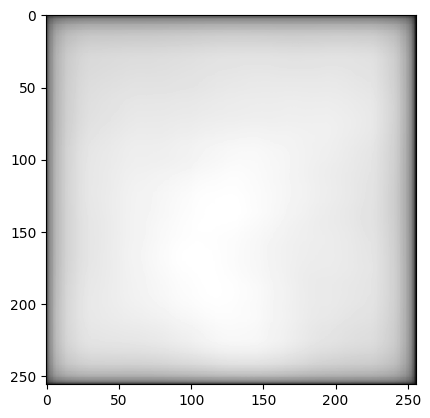

In [ ]:
plt.imshow(train_decoded[1].reshape(256, 256,1), cmap='gray')

In [ ]:
for i in range(10)
  plt.imshow(dcmMask[i+1].reshape(256, 256), cmap='gray')

SyntaxError: ignored